In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
from IPython.display import HTML

pd.options.mode.chained_assignment = None

# 加購解鎖之後的加購表現

#### 每日各類別活躍度

In [420]:
data = pd.read_excel('MiniExpress_news.xls')

def cktype(x):
    if '取消' in x:
        return 'Cancel'
    elif '增加' in x:
        return 'Increase'
    elif '減少' in x:
        return 'Reduce'
    else:
        print('ERROR')

def big52utf(x):
    if x[0] == '五':
        return ('5/'+x[3:5]).strip(' ')
    elif x[0] == '四':
        return ('4/'+x[3:5]).strip(' ')
    else:
        print('ERROR')

data1 = data[data['type']=='認繳']
data1['type'] = 'New'
        
data_new = data[data['type']=='調整']
data_new['type'] = data[data['type'] =='調整']['news'].apply(lambda x: cktype(x))

data = pd.concat([data1, data_new], axis=0).sort_index()
data['time'] = data['time'].apply(lambda x: big52utf(x))
del data1, data_new
data.head()

,time,type,news,backer,backer_url
0,5/21,New,"Spencer 認繳了 ¥ 7,590.00，選擇了 $69 USD — Round-Tri...",Spencer,https://www.kickstarter.com/projects/moaideas/...
1,5/21,New,"John 認繳了 ¥ 4,290.00，選擇了 $39 USD — Limited Exp...",John,https://www.kickstarter.com/projects/moaideas/...
2,5/21,New,"Readydot WeAre 認繳了 ¥ 7,590.00，選擇了 $69 USD — Ro...",Readydot WeAre,https://www.kickstarter.com/projects/moaideas/...
3,5/21,Increase,"Jirka Zaňát 將其認繳從 ¥ 12,970.00 增加到 ¥ 23,750.00，...",Jirka Zaňát,https://www.kickstarter.com/projects/moaideas/...
4,5/21,New,"Johnny, Board Game Informant 認繳了 ¥ 110.00，選擇了 ...","Johnny, Board Game Informant",https://www.kickstarter.com/projects/moaideas/...


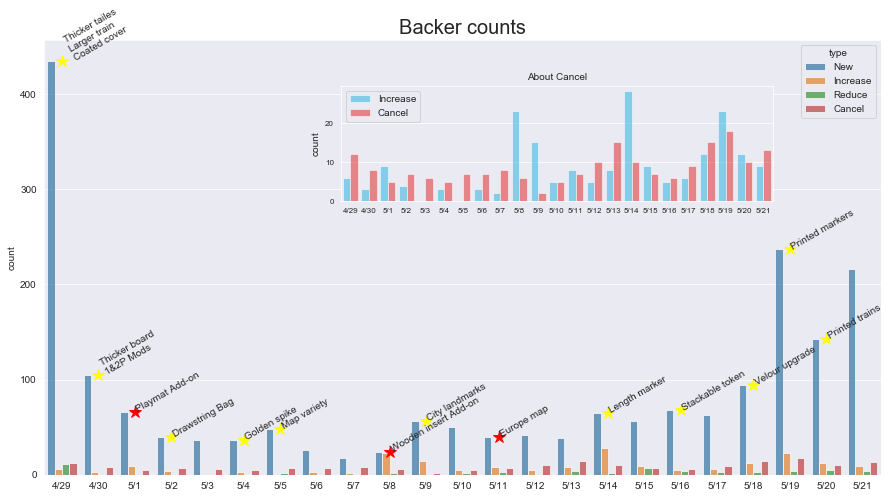

In [427]:
def order(x):
    if x in xticks:
        return xticks.index(x)
    else:
        print('ERROR')

plot_data = data[['time', 'type', 'backer']].copy()
xticks = ['4/29', '4/30', '5/1', '5/2', '5/3', '5/4', '5/5', '5/6', '5/7', '5/8', '5/9', '5/10', '5/11', '5/12', '5/13', '5/14', '5/15', '5/16', '5/17', '5/18', '5/19', '5/20', '5/21']
plot_data['xtick'] = plot_data['time'].apply(lambda x: order(x))
plot_ss = plot_data[plot_data.type.isin(['Increase', 'Cancel'])]

with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1,1, figsize=(15, 8))
    plt.xlim(-1, 24)
    sns.countplot(plot_data['xtick'], hue=plot_data['type'], hue_order=['New', 'Increase', 'Reduce', 'Cancel'], ax=ax, alpha=0.7)
    ax.plot(0, 435, marker='*', color='yellow', markersize=12)
    ax.plot(1, 105, marker='*', color='yellow', markersize=12)
    ax.plot(2, 66, marker='*', color='red', markersize=12)
    ax.plot(3, 40, marker='*', color='yellow', markersize=12)
    ax.plot(5, 37, marker='*', color='yellow', markersize=12)
    ax.plot(6, 48, marker='*', color='yellow', markersize=12)
    ax.plot(9, 24, marker='*', color='red', markersize=12)
    ax.plot(10, 57, marker='*', color='yellow', markersize=12)
    ax.plot(12, 40, marker='*', color='red', markersize=12)
    ax.plot(15, 65, marker='*', color='yellow', markersize=12)
    ax.plot(17, 68, marker='*', color='yellow', markersize=12)
    ax.plot(19, 94, marker='*', color='yellow', markersize=12)
    ax.plot(20, 237, marker='*', color='yellow', markersize=12)
    ax.plot(21, 143, marker='*', color='yellow', markersize=12)
    
    plt.text(0, 435, 'Thicker tailes\nLarger train\nCoated cover', rotation=30)
    plt.text(1, 105, 'Thicker board\n1&2P Mods', rotation=30)
    plt.text(2, 66, 'Playmat Add-on', rotation=30)
    plt.text(3, 40, 'Drawstring Bag', rotation=30)
    plt.text(5, 37, 'Golden spike', rotation=30)
    plt.text(6, 48, 'Map variety', rotation=30)
    plt.text(9, 24, 'Wooden insert Add-on', rotation=30)
    plt.text(10, 57, 'City landmarks', rotation=30)
    plt.text(12, 40, 'Europe map', rotation=30)
    plt.text(15, 65, 'Length marker', rotation=30)
    plt.text(17, 68, 'Stackable token', rotation=30)
    plt.text(19, 94, 'Velour upgrade', rotation=30)
    plt.text(20, 237, 'Printed markers', rotation=30)
    plt.text(21, 143, 'Printed trains', rotation=30)
    
    plt.xticks(np.arange(0, 23), xticks)
    plt.xlabel('')
    plt.title('Backer counts', fontsize=20)
    
    axe_small = plt.axes([0.4, 0.6, 0.4, 0.2])
    sns.countplot(plot_ss['xtick'], hue=plot_ss['type'], palette=['#00bfff', 'r'], alpha=0.5, ax=axe_small)
    plt.yticks(fontsize=8)
    plt.xticks(np.arange(0, 23), xticks, fontsize=8)
    plt.xlabel('')
    plt.legend(loc=2)
    plt.title('About Cancel', fontsize=10)
#     axe_small.pie(data2, labels=data2.index, colors=['#dc143c', '#483d8b'], radius=1, wedgeprops=dict(width=0.35, edgecolor='w'))
#     axe_small.text(-0.5, -0.05, '{:.2f}%'.format(data2['member']['Wix_69']/(data2['member']['Wix_Other']+data2['member']['Wix_69'])*100), fontsize=14)
#     plt.title('In Wix_list')
    
    
    plt.show()

In [ ]:
# def str2int(x):
#     num=''
#     for y in x:
#         if y.isdigit():
#             num+=y
#         else:
#             continue
#     return int(num)

# def diff(x):
#     if '增加到' in x:
#         x = x.split('認繳從')[1]
#         x1 = x.split('增加到')[0]
#         x2 = x.split('增加到')[1].split('，')[0]
        
#         y = (str2int(x2) - str2int(x1))/100
#         return int(y)
#     elif '減少到' in x:
#         x = x.split('認繳從')[1]
#         x1 = x.split('減少到')[0]
#         x2 = x.split('減少到')[1].split('，')[0]
        
#         y = (str2int(x1) - str2int(x2))/100
#         return int(y)

# data1 = data[data['type']=='New']
# data2 = data[data['type']=='Increase']
# data3 = data[data['type']=='Reduce']
# data4 = data[data['type']=='Cancel']

# data1['price'] = data1['news'].apply(lambda x: x.split('認繳了')[1].split('，')[0]).apply(lambda x: int(str2int(x)/100))
# data2['price'] = data2['news'].apply(lambda x: diff(x))
# data3['price'] = data3['news'].apply(lambda x: diff(x))
# data4['price'] = data4['news'].apply(lambda x: x.split('取消了')[1].split('，')[0]).apply(lambda x: int(str2int(x)/100))

# data = pd.concat([data1, data2, data3, data4], axis=0).sort_index()

In [ ]:
# def order(x):
#     if x in xticks:
#         return xticks.index(x)
#     else:
#         print('ERROR')

# plot_data = data.groupby(['time', 'type'])['price'].sum().reset_index().copy()
# xticks = ['4/29', '4/30', '5/1', '5/2', '5/3', '5/4', '5/5', '5/6', '5/7', '5/8', '5/9', '5/10', '5/11', '5/12', '5/13', '5/14', '5/15', '5/16', '5/17', '5/18', '5/19', '5/20', '5/21']
# plot_data['xtick'] = plot_data['time'].apply(lambda x: order(x))

# with sns.axes_style('darkgrid'):
#     fig, ax = plt.subplots(1,1, figsize=(15, 8))
# #     sns.countplot(plot_data['xtick'], hue=plot_data['type'], hue_order=['New', 'Increase', 'Reduce', 'Cancel'], ax=ax, alpha=0.7)
#     sns.barplot(plot_data['xtick'], plot_data['price'], hue=plot_data['type'], hue_order=['New', 'Increase', 'Reduce', 'Cancel'], ax=ax, alpha=0.7)
#     plt.xticks(np.arange(0, 23), xticks)
#     plt.xlabel('')
#     plt.show()

#### 解鎖時間

In [349]:
data2 = pd.read_csv('./History/KS_history_0429~final.csv')

def parse_time(x):
    x, y = x[5:13], x[14:16]
    if int(y)>=30:
        return x+':30'
    else:
        return x+':00'
data2['hr'] = data2['time'].apply(lambda x: x.split(' ')[1][:2])
data2['time'] = data2['time'].apply(lambda x: parse_time(x))
time_data = data2[['time', 'pledged']]
time_data.head()

,time,pledged
0,04/29 00:30,64790.0
1,04/29 01:00,436430.0
2,04/29 01:30,660610.0
3,04/29 02:00,767549.0
4,04/29 02:30,835309.0


In [355]:
print('第01項解鎖：'+time_data[time_data['pledged']>1100000].iloc[0,:]['time'])
print('第02項解鎖：'+time_data[time_data['pledged']>1300000].iloc[0,:]['time'])
print('第03項解鎖：'+time_data[time_data['pledged']>1512000].iloc[0,:]['time'])
print('第04項解鎖：'+time_data[time_data['pledged']>1728000].iloc[0,:]['time'])
print('第05項解鎖：'+time_data[time_data['pledged']>1944000].iloc[0,:]['time'])
print('第06項解鎖：'+time_data[time_data['pledged']>2160000].iloc[0,:]['time'])
print('第07項解鎖：'+time_data[time_data['pledged']>2376000].iloc[0,:]['time'])
print('第08項解鎖：'+time_data[time_data['pledged']>2592000].iloc[0,:]['time'])
print('第09項解鎖：'+time_data[time_data['pledged']>2916000].iloc[0,:]['time'])
print('第10項解鎖：'+time_data[time_data['pledged']>3240000].iloc[0,:]['time'])
print('第11項解鎖：'+time_data[time_data['pledged']>3564000].iloc[0,:]['time'])
print('第12項解鎖：'+time_data[time_data['pledged']>3888000].iloc[0,:]['time'])
print('第13項解鎖：'+time_data[time_data['pledged']>4320000].iloc[0,:]['time'])
print('第14項解鎖：'+time_data[time_data['pledged']>4860000].iloc[0,:]['time'])
print('第15項解鎖：'+time_data[time_data['pledged']>5400000].iloc[0,:]['time'])
print('第16項解鎖：'+time_data[time_data['pledged']>5940000].iloc[0,:]['time'])
print('第17項解鎖：'+time_data[time_data['pledged']>6480000].iloc[0,:]['time'])
print('第18項解鎖：'+time_data[time_data['pledged']>7560000].iloc[0,:]['time'])

第01項解鎖：04/29 05:30
第02項解鎖：04/29 09:00
第03項解鎖：04/29 15:00
第04項解鎖：04/29 22:00
第05項解鎖：04/30 04:30
第06項解鎖：04/30 21:30
第07項解鎖：05/01 09:00
第08項解鎖：05/02 04:00
第09項解鎖：05/04 02:30
第10項解鎖：05/05 21:30
第11項解鎖：05/08 23:00
第12項解鎖：05/09 22:00
第13項解鎖：05/11 23:30
第14項解鎖：05/14 11:30
第15項解鎖：05/16 11:00
第16項解鎖：05/18 04:30
第17項解鎖：05/19 04:00
第18項解鎖：05/20 05:00


In [ ]:
# data2 = data2[['time', 'pledged']]

# #實值報表
# data2['diff'] = data2['pledged'].copy()
# for x in range(len(data2['diff'])):
#     if x == 0:
#         data2['diff'][x] = np.NaN #起始無值項目
# #     elif x == 1:
# #         data2['diff'][x] = np.NaN #圖表數值過高削減
# #     elif x == 2:
# #         data2['diff'][x] = np.NaN #圖表數值過高削減
#     else:
#         data2['diff'][x] = (data2['diff'][x]-data2['pledged'][x-1])

# # data['rate'] = data['rate']*20000000

# data2['diff'] = data2['diff']*20000000
# data2.head()

In [ ]:
# with sns.axes_style('whitegrid'):
#     fig, axes = plt.subplots(1, 1,figsize=(30, 8))
#     sns.barplot(x='time', y='diff', color='red', alpha=0.4, data=data2, ax=axes, label='Growth') 
#     sns.lineplot(x='time', y='pledged', color='#ffd700', linewidth=3, data=data2, ax=axes, label='Pledged')
#     axes.text(len(data2)-1, data2['pledged'].get(len(data2)-1)+10000, '{}'.format(data2['pledged'].get(len(data2)-1)))
#     # plt.grid(True)

# #     for x in range(len(data2['time'])):
# #         axes.text(data2['time'][x], data2['diff'][x], '{}'.format((data2['diff'][x]/20)),
# #                   horizontalalignment='center', fontsize=9, rotation=-90)
# #     axes.text(1, 400000, '{}'.format(data2['pledged'][1]-data2['pledged'][0]), horizontalalignment='center', fontsize=9, rotation=-90)
# #     axes.text(2, 650000, '{}'.format(data2['pledged'][2]-data2['pledged'][1]), horizontalalignment='center', fontsize=9, rotation=-90)


#     plt.xlim(-1, len(data2)+1)
#     plt.ylabel('JYP', size=15)
#     plt.xticks('', rotation=-90)
#     plt.xlabel("Time", size=15)
#     plt.title('Pledged and growth', fontsize=20)
#     plt.legend(loc='best')

#     plt.tight_layout()
#     plt.show()
#     # plt.savefig('./grow_rate.png', dpi=300)

----

# 買$69方案的人都是哪些國家的人？

In [416]:
data = pd.read_excel('MiniExpress_Add-on.xls')
cust_69 = data[data['Reward Title']=='$69 USD — Round-Trip Limited Express']

adress = pd.read_excel('Wix_adress_list.xls')
wix_69 = cust_69[cust_69['Email'].isin(list(adress['Email']))]

BN_df = pd.DataFrame([wix_69.groupby('Country').count()['Backer Number'].sort_values(ascending=False),
                      cust_69.groupby('Country').count()['Backer Number'].sort_values(ascending=False)]).T
BN_df.columns = ['Wix', 'Total']
BN_df['Wix'] = BN_df['Wix'].fillna(0)
BN_df['Others'] = BN_df['Total'] - BN_df['Wix']
BN_df

,Wix,Total,Others
US,17.0,217.0,200.0
GB,4.0,17.0,13.0
DE,3.0,9.0,6.0
SE,2.0,8.0,6.0
IT,2.0,8.0,6.0
TH,1.0,3.0,2.0
NL,1.0,2.0,1.0
IL,1.0,2.0,1.0
HU,1.0,1.0,0.0
FR,1.0,9.0,8.0


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


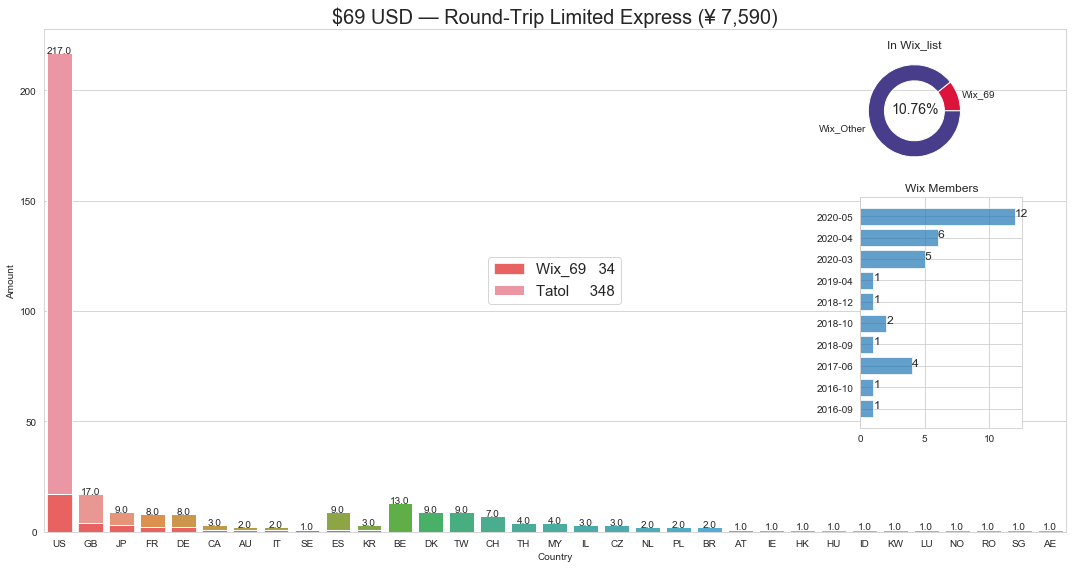

In [417]:
plot_data = cust_69.groupby('Country').count()['Backer Number'].sort_values(ascending=False)
data2 = pd.DataFrame([len(wix_69),len(data[data['Email'].isin(list(adress['Email']))])-len(wix_69)], index=['Wix_69', 'Wix_Other'], columns=['member'])
wix_ls = adress[adress['Email'].isin(list(cust_69['Email']))]['Created At'].apply(lambda x:x.split(' ')[0][:7]).value_counts().sort_index()

with sns.axes_style('whitegrid'):
    fig, ax = plt.subplots(1, 1, figsize=(15, 8))
    sns.barplot(x=plot_data.index, y=BN_df['Wix'], color='red', alpha=0.7, label='Wix_69   {:.0f}'.format(BN_df['Wix'].sum()))
    sns.barplot(x=plot_data.index, y=BN_df['Others'], bottom=BN_df['Wix'], label='Tatol     {:.0f}'.format(BN_df['Total'].sum()))
    for i in range(len(plot_data)):
        plt.text(i, BN_df.iat[i, 1], BN_df.iat[i, 1],
                 horizontalalignment='center')
    plt.xlabel('Country')
    plt.ylabel('Amount')
    plt.title('$69 USD — Round-Trip Limited Express (¥ 7,590)', fontsize=20)
    plt.legend(loc=10, fontsize=15)
        
    axe_small = plt.axes([0.75, 0.7, 0.2, 0.2])
    axe_small.pie(data2, labels=data2.index, colors=['#dc143c', '#483d8b'], radius=1, wedgeprops=dict(width=0.35, edgecolor='w'))
    axe_small.text(-0.5, -0.05, '{:.2f}%'.format(data2['member']['Wix_69']/(data2['member']['Wix_Other']+data2['member']['Wix_69'])*100), fontsize=14)
    plt.title('In Wix_list')
    
    axe_ss = plt.axes([0.8, 0.25, 0.15, 0.4])
    axe_ss.barh(wix_ls.index, wix_ls, alpha=0.7)
    for i in range(len(wix_ls)):
        plt.text(wix_ls.iat[i], i, wix_ls.iat[i], fontsize=12)
    plt.title('Wix Members')
    
    plt.tight_layout()
    plt.savefig('69_project.png', dpi=150)
#     plt.show()

----

# 北美下單時間

In [104]:
data = pd.read_excel('MiniExpress_Add-on.xls')

In [105]:
us_data = data[data['Country']=='US'].copy()
print('北美最終下單總數：{}\n平均消費金額：￥{:.4f}'.format(len(us_data), us_data['Pledge Amount'].sum()/len(us_data)))
us_data['Pledged Hr'] = us_data['Pledged At'].apply(lambda x: x.split(' ')[1].split(':')[0])
Hr_count = us_data['Pledged Hr'].value_counts().sort_index()

北美最終下單總數：797
平均消費金額：￥5680.4291


Text(0.5, 1.0, 'Pledged from US')

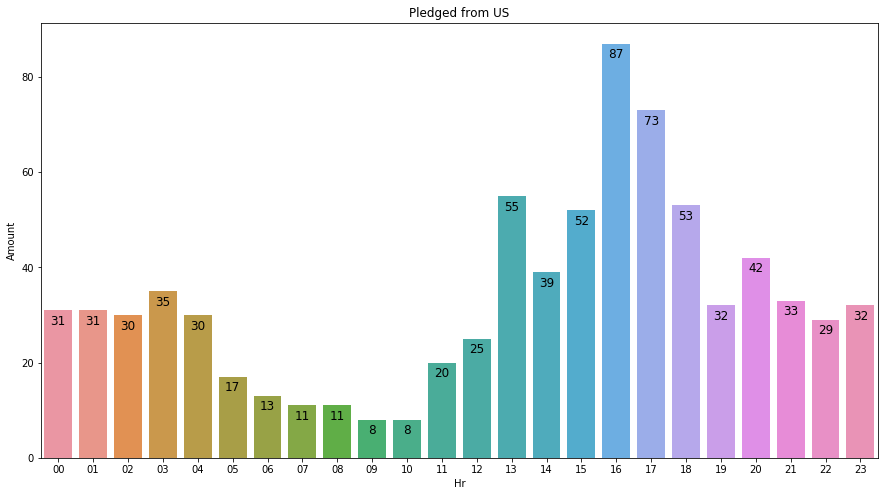

In [106]:
flg, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.barplot(Hr_count.index, Hr_count, ax=ax)
for i in range(24):
    plt.text(i, Hr_count[i]-3, Hr_count[i],
            horizontalalignment='center', size=12)
plt.xlabel('Hr')
plt.ylabel('Amount')
plt.title('Pledged from US')

----

# 歐洲下單時間

In [108]:
Europe_list = '法國，英國，愛爾蘭，比利時，盧森堡，荷蘭及摩納哥，德國，奧地利，瑞士，列支敦斯登，波蘭，捷克，斯洛伐克及匈牙利，冰島，丹麥，挪威，瑞典，芬蘭，俄羅斯，白俄羅斯，烏克蘭，愛沙尼亞，拉脫維亞，立陶宛，摩爾多瓦, 羅馬尼亞, 保加利亞, 亞塞拜然, 亞美尼亞, 喬治亞，葡萄牙，西班牙，安道爾，義大利，教廷，聖馬利諾，馬爾他，塞爾維亞，克羅埃西亞，梵蒂岡, 斯洛維尼亞，波士尼亞赫塞哥維納，蒙特內哥羅共和國，馬其頓，阿爾巴尼亞，希臘'.replace('，', ',').replace(' ', '').split(',')

eu_data = data[data['Country_name'].isin(Europe_list)].copy()
print('歐洲最終下單總數：{}\n平均消費金額：￥{:.4f}'.format(len(eu_data), eu_data['Pledge Amount'].sum()/len(eu_data)))
eu_data['Pledged Hr'] = eu_data['Pledged At'].apply(lambda x: x.split(' ')[1].split(':')[0])
Hr_count = eu_data['Pledged Hr'].value_counts()
Hr_count['02'] = 0 #特別補值
Hr_count.sort_index(inplace=True)

eu = eu_data['Country'].value_counts()
eu_hr = eu_data[['Country', 'Pledged Hr']].sort_values(by=['Country','Pledged Hr'])
time_list = us_data['Pledged Hr'].unique()

歐洲最終下單總數：452
平均消費金額：￥5579.1394


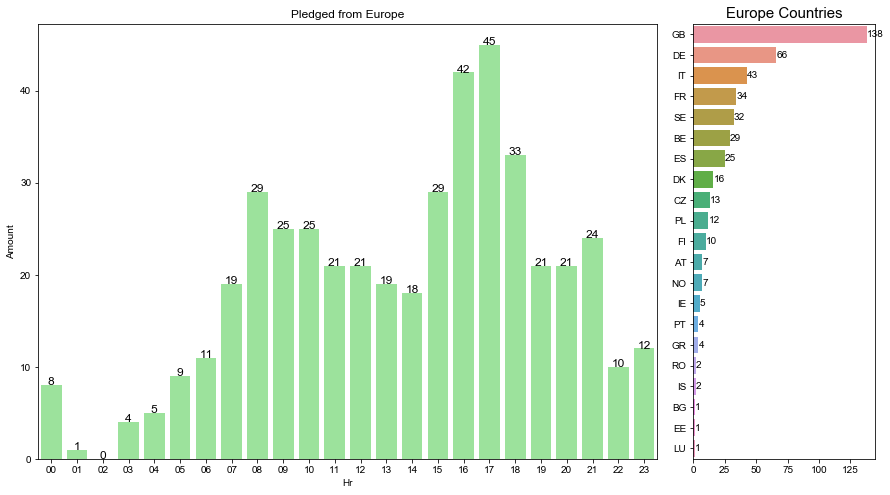

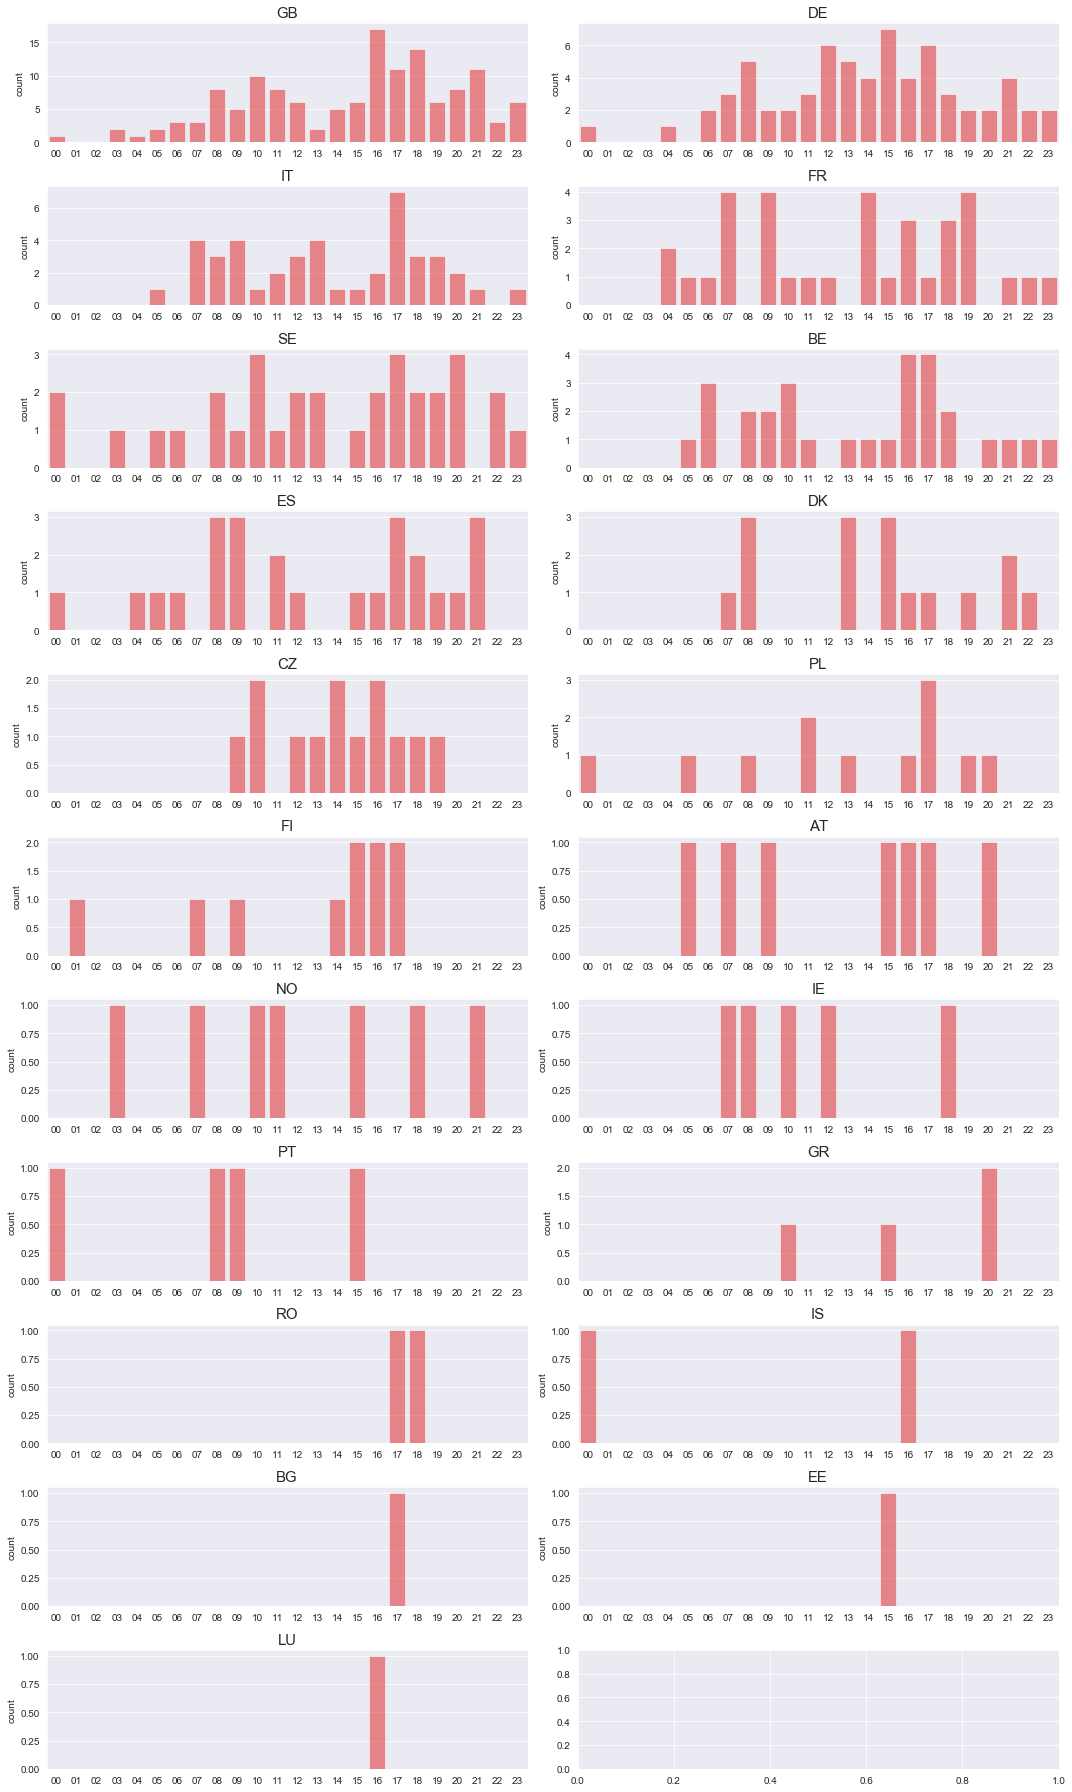

In [111]:
plt.figure(figsize=(15, 8))

ax1 = plt.subplot2grid((1,4), (0,0), colspan=3)
sns.barplot(Hr_count.index, Hr_count, color='#90ee90', ax=ax1)
for i in range(24):
    plt.text(i, Hr_count[i], Hr_count[i],
            horizontalalignment='center', size=12)
ax1.set_xlabel('Hr')
ax1.set_ylabel('Amount')
ax1.set_title('Pledged from Europe')

ax2 = plt.subplot2grid((1,4), (0,3))
sns.barplot(eu, eu.index, ax=ax2)
for i in range(len(eu)):
    plt.text(eu[i], i, eu[i], verticalalignment='center')
ax2.set_xlabel('')
ax2.set_title('Europe Countries', fontsize=15)
# plt.tight_layout()
# plt.show()

with sns.axes_style('darkgrid'):
    fig, axes = plt.subplots(11, 2, figsize=(15, 25))
    for i,country in enumerate(eu.index):
        ss = {}
        for x in eu_hr[eu_hr['Country']=='{}'.format(country)]['Pledged Hr'].value_counts().index:
            ss[x] = eu_hr[eu_hr['Country']=='{}'.format(country)]['Pledged Hr'].value_counts()[x]
        for x in time_list:
            if x not in ss:
                ss[x] = 0
            else:
                pass
        ss = pd.DataFrame(ss.items(), columns=['time', 'count']).set_index('time').sort_index()
        sns.barplot(ss.index, ss['count'], color='red', alpha=0.5, ax=axes[i//2][i%2])
        axes[i//2][i%2].set_title(country, fontsize=15)
        axes[i//2][i%2].set_xlabel('')
    plt.tight_layout()
    plt.show()

----

# 贊助我們的人，過去贊助ks的次數

In [363]:
data = pd.read_excel('MiniExpress_news.xls')

In [364]:
# from selenium import webdriver
# from bs4 import BeautifulSoup

# browser = webdriver.Chrome(executable_path='chromedriver')
# browser.get(data['backer_url'][0])
# browser.find_element_by_id("user_session_email").send_keys("cameronqoo@gmail.com")
# browser.find_element_by_id("user_session_password").send_keys("ailent32123")
# browser.find_element_by_name("commit").click()

In [365]:
# spider = []
# for url in data.backer_url:
#     browser.get(url)
#     soup = BeautifulSoup(browser.page_source, 'html5lib')
#     temp = []
#     try:
#         target = soup.select_one('.backer_number').select_one('a').text.rstrip('\n').lstrip('#')
#         temp.append(target)
#     except:
#         temp.append('no_backer#')
    
#     try:
#         target = soup.select_one('.activity').select_one('a').text
#         temp.append(target)
#     except:
#         temp.append('no_pledged')
    
#     try:
#         target = soup.find(class_='f4').text.split('\n')[2]
#         temp.append(target)
#     except:
#         temp.append('No data')
    
#     spider.append(temp)
#     time.sleep(5)

In [366]:
def str2int(x):
    num=''
    for y in x:
        if y.isdigit():
            num+=y
        else:
            continue
    if num != '':
        return int(num)
    else:
        return 0

data = data[['Backer Number', 'back_count', 'location']]
data.drop_duplicates('Backer Number', 'first', inplace=True)
data.back_count = data.back_count.apply(lambda x: str2int(x))
ss = data.back_count.value_counts().sort_index().reset_index()
ss.columns=['back_count', 'amount']

count_data = {}
count_data['0'] = ss[ss.back_count==0].amount.sum()
sss = ss[ss.back_count>0]
count_data['<100'] = sss[sss.back_count<=100].amount.sum()
sss = ss[ss.back_count>100]
count_data['<500'] = sss[sss.back_count<=500].amount.sum()
sss = ss[ss.back_count>500]
count_data['<1000'] = sss[sss.back_count<=1000].amount.sum()
count_data['1000^'] = ss[ss.back_count>1000].amount.sum()
del sss

print('Outlier：')
ss.tail(5)

Outlier：


,back_count,amount
418,3547,1
419,3933,1
420,5390,1
421,5500,1
422,86801,1


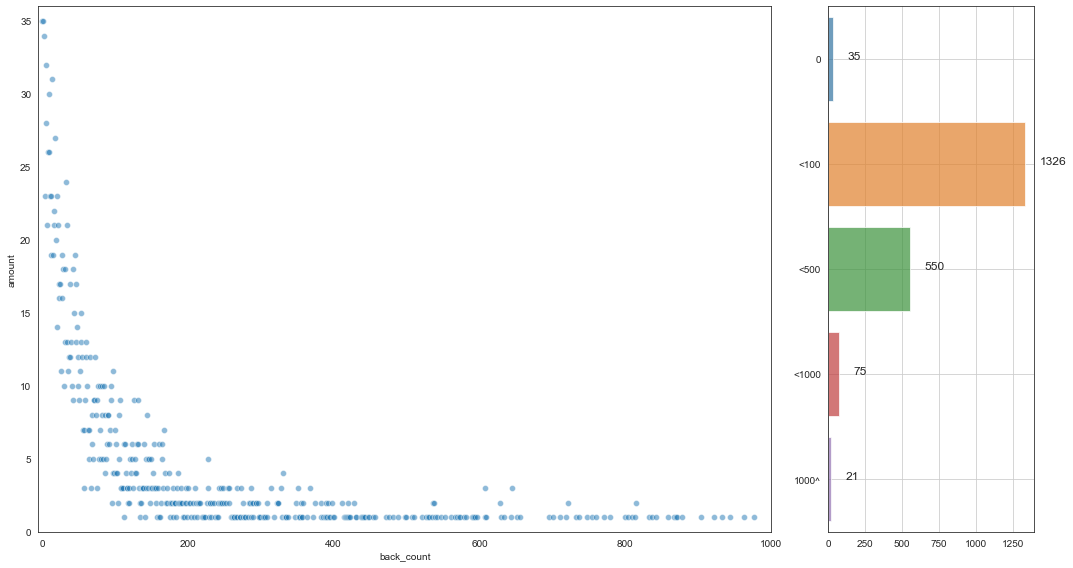

In [367]:
ss = ss[ss['back_count']<1000]
ss.set_index('back_count')
plt.figure(figsize=(15, 8))
with sns.axes_style('white'):
    ax1 = plt.subplot2grid((1,4), (0,0), colspan=3)
    ax1.plot(np.arange(0, 1000), np.zeros(1000), 'w')
    sns.scatterplot(ss.back_count, ss.amount, alpha=0.5, ax=ax1)
    plt.xlim(-5, 1000)
    plt.ylim(0, 36)
    
    ax2 = plt.subplot2grid((1,4), (0,3))
    sns.barplot(list(count_data.values()), list(count_data.keys()), alpha=0.7, ax=ax2)
    for i, x in enumerate(count_data.values()):
        ax2.text(x+100, i, x, fontsize=12)
    ax2.grid()
    
    plt.tight_layout()
    plt.show()

----

# Email list在前三天贊助的數量

In [357]:
data = pd.read_excel('./MiniExpress_Add-on.xls')
old = pd.read_excel('KS_OldCustomer.xls')

old['Pledged At'] = old['Pledged At'].apply(lambda x:x.split(',')[0][-5:])
data['Pledged At'] = data['Pledged At'].apply(lambda x:x.split(',')[0][-5:])

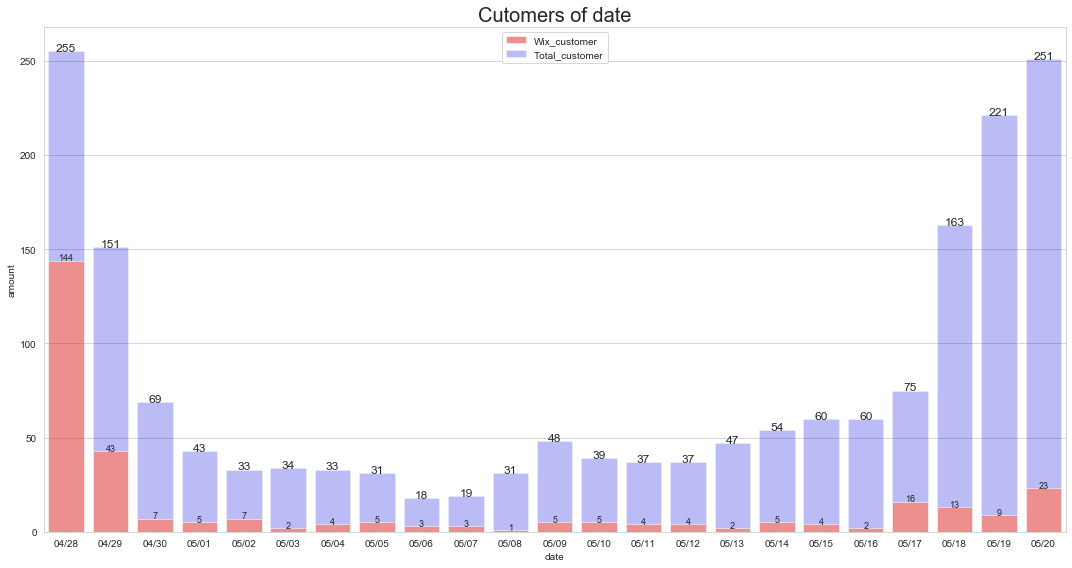

In [358]:
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15, 8))
    sns.barplot(old.groupby('Pledged At')['Pledged At'].count().index, old.groupby('Pledged At')['Pledged At'].count(), color='red', alpha=0.5, label='Wix_customer')
    sns.barplot(data.groupby('Pledged At')['Pledged At'].count().index, data.groupby('Pledged At')['Pledged At'].count()-old.groupby('Pledged At')['Pledged At'].count(), bottom=old.groupby('Pledged At')['Pledged At'].count(), color='blue', alpha=0.3, label='Total_customer')

    
    for i in range(23):
        plt.text(i, old.groupby('Pledged At')['Pledged At'].count()[i], old.groupby('Pledged At')['Pledged At'].count()[i],
                 horizontalalignment='center', fontsize=9)
    for i in range(23):
        plt.text(i, data.groupby('Pledged At')['Pledged At'].count()[i], data.groupby('Pledged At')['Pledged At'].count()[i],
                 horizontalalignment='center', fontsize=12)
        
    plt.title('Cutomers of date', fontsize=20)
    plt.xlabel('date')
    plt.ylabel('amount')
    
    
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

----

# $1方案者轉換追蹤　回來加碼

In [370]:
data = pd.read_excel('MiniExpress_news.xls')

def pro_1(x):
    if '將其回報選擇從 $1 USD' in x:
        return True
    else:
        return np.NaN

def str2int(x):
    num=''
    for y in x:
        if y.isdigit():
            num+=y
        else:
            continue
    return int(num)

def diff(x):
    if '增加到' in x:
        x = x.split('認繳從')[1]
        x2 = x.split('增加到')[1].split('，')[0]
        y = str2int(x2)/100
        return int(y)
    elif '減少到' in x:
        x = x.split('認繳從')[1]
        x2 = x.split('減少到')[1].split('，')[0]
        y = str2int(x2)/100
        return int(y)
    elif '取消了' in x:
        return 0
    else:
        x = x.split('認繳了')[1]
        y = str2int(x)/100
        return int(y)

def timer(x):
    x = x.split(' ')[1]
    if int(x) <10:
        return '5/0'+x
    elif int(x)<25:
        return '5/'+x
    else:
        return '4/'+x

data['from_1'] = data['news'].apply(lambda x: pro_1(x))
target_list = list(data[data['from_1'].notnull()]['backer_url'].unique())

project_1 = []
for target in target_list:
    ss = data[data['backer_url']==target]
    if len(ss)>=2:
        for i in range(len(ss)):
            temp=[]
            temp.append(target.split('/')[-1])
            ss_data = ss.iloc[i]
            temp.append(ss_data['time'])
            temp.append(ss_data['news'].split('，')[0])
            project_1.append(temp)
    else:
        continue
data = pd.DataFrame(project_1, columns=['UID', 'time', 'news'])
data['price'] = data.news.apply(lambda x: diff(x))
data.time = data.time.apply(lambda x: timer(x))
data = data.sort_values(['UID', 'time'])
xticks = list(data.time.unique())
xticks.sort()

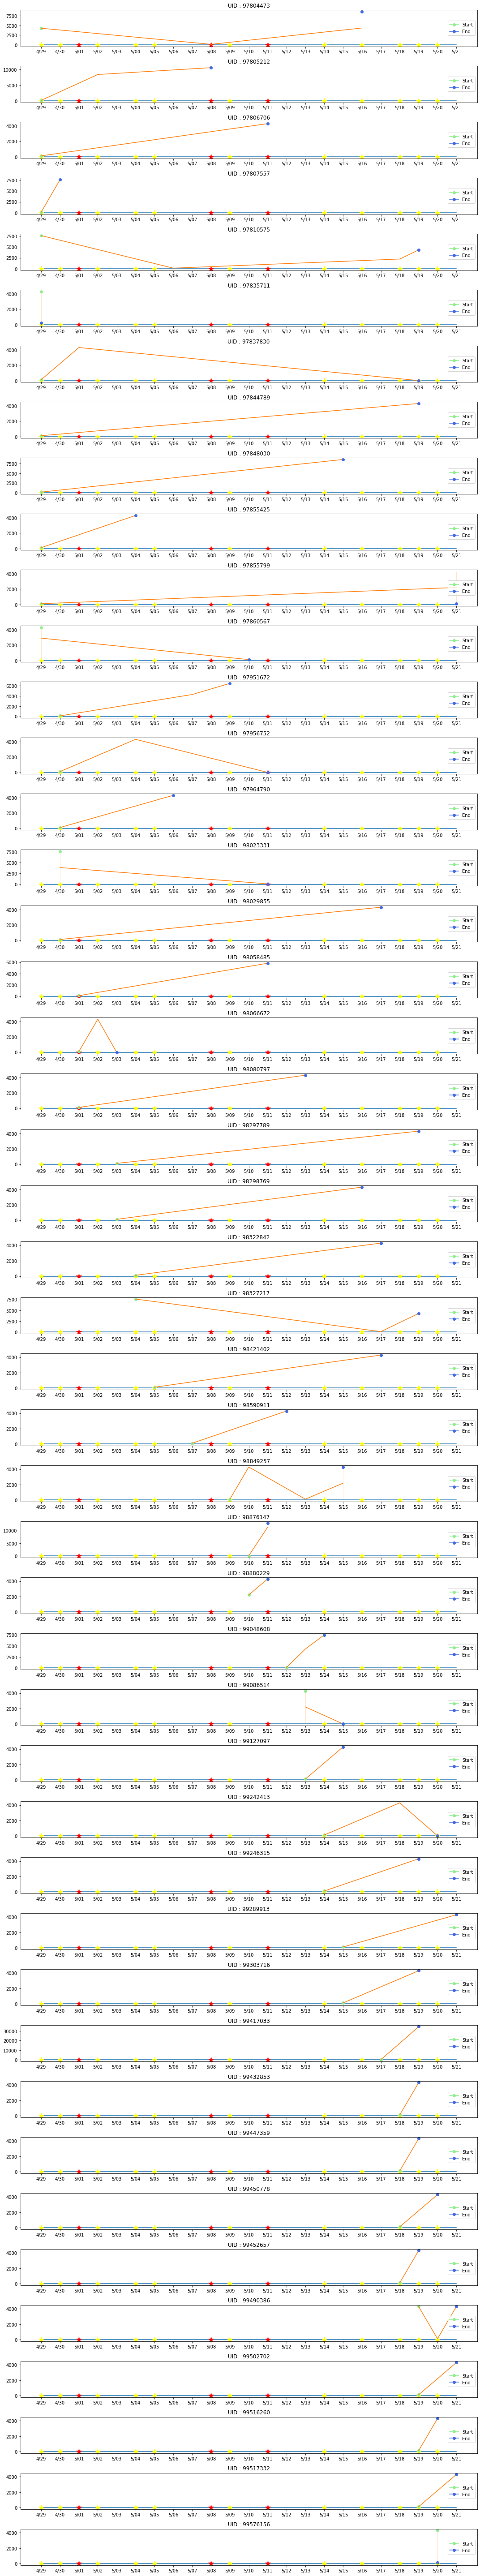

In [372]:
fig, axes = plt.subplots(46, 1, figsize=(15, 80))

for i, uid in enumerate(data.UID.unique()):
    #畫底圖▼
    sns.lineplot(xticks, np.zeros(23), ax=axes[i])
    axes[i].plot(0, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(1, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(2, 0, marker='*', color='red', markersize=12)
    axes[i].plot(3, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(5, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(6, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(9, 0, marker='*', color='red', markersize=12)
    axes[i].plot(10, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(12, 0, marker='*', color='red', markersize=12)
    axes[i].plot(15, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(17, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(19, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(20, 0, marker='*', color='yellow', markersize=12)
    axes[i].plot(21, 0, marker='*', color='yellow', markersize=12)
    #畫底圖▲
    
    id_data = data[data.UID==uid]
    axes[i].plot('time', 'price', marker='o', color='#90ee90', data=id_data.iloc[0], label='Start')
    sns.lineplot('time', 'price', data=id_data, ax=axes[i])
    axes[i].plot('time', 'price', marker='o', color='#4169e1', data=id_data.iloc[-1], label='End')
    
#     axes[i].text(0, 0, 'Thicker tailes\nLarger train\nCoated cover', rotation=30)
#     axes[i].text(1, 0, 'Thicker board\n1&2P Mods', rotation=30)
#     axes[i].text(2, 0, 'Playmat Add-on', rotation=30)
#     axes[i].text(3, 0, 'Drawstring Bag', rotation=30)
#     axes[i].text(5, 0, 'Golden spike', rotation=30)
#     axes[i].text(6, 0, 'Map variety', rotation=30)
#     axes[i].text(9, 0, 'Wooden insert Add-on', rotation=30)
#     axes[i].text(10, 0, 'City landmarks', rotation=30)
#     axes[i].text(12, 0, 'Europe map', rotation=30)
#     axes[i].text(15, 0, 'Length marker', rotation=30)
#     axes[i].text(17, 0, 'Stackable token', rotation=30)
#     axes[i].text(19, 0, 'Velour upgrade', rotation=30)
#     axes[i].text(20, 0, 'Printed markers', rotation=30)
#     axes[i].text(21, 0, 'Printed trains', rotation=30)
    axes[i].legend(loc=7)
    axes[i].set_title('UID : '+str(uid))
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

----

----
#### #End Code

In [368]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')